In [1]:
import matplotlib.pyplot as plt
import LightPipes as lp
import numpy as np

from focal_spot_pattern import create_gaussian_mask
from propagation import fresnel_propagation

In [2]:
grid_dimension = 500
lambda_ = 2.75e-10
I0 = 1e6
z = 1

In [3]:
N_F = [0.5, 1, 4, 10]

## Simple case - beam passing through square aperture

In [22]:
F_in = []
E_in = []

F_out = []
E_out = []
start_end = []

for n in N_F:
    w = np.sqrt(n*lambda_*z)
    grid_size = 6*w

    f_in = lp.Begin(grid_size, lambda_, grid_dimension)
    f_in = lp.RectAperture(2*w, 2*w, 0, f_in)
    F_in.append(f_in)

    x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    X,Y = np.meshgrid(x,y)

    e_in = np.ones([grid_dimension,grid_dimension], dtype = np.complex128)
    e_in[X<=-w] = 0 +0j
    e_in[X>=w] = 0 +0j
    e_in[Y<=-w] = 0 +0j
    e_in[Y>=w] = 0 +0j

    E_in.append(e_in)

    F_out.append(lp.Fresnel(f_in, z))
    e_out, start, end = fresnel_propagation(e_in, lambda_, z, grid_size/grid_dimension, padding_factor=10)
    E_out.append(e_out)
    start_end.append((start,end))

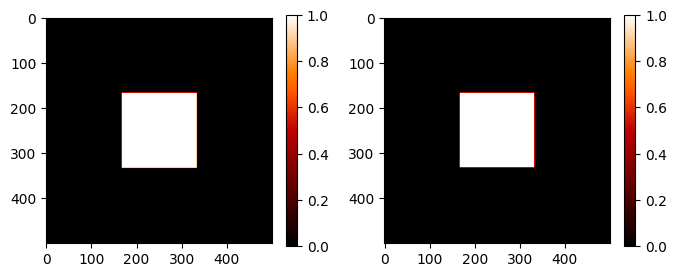

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(f_in.field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(e_in)**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

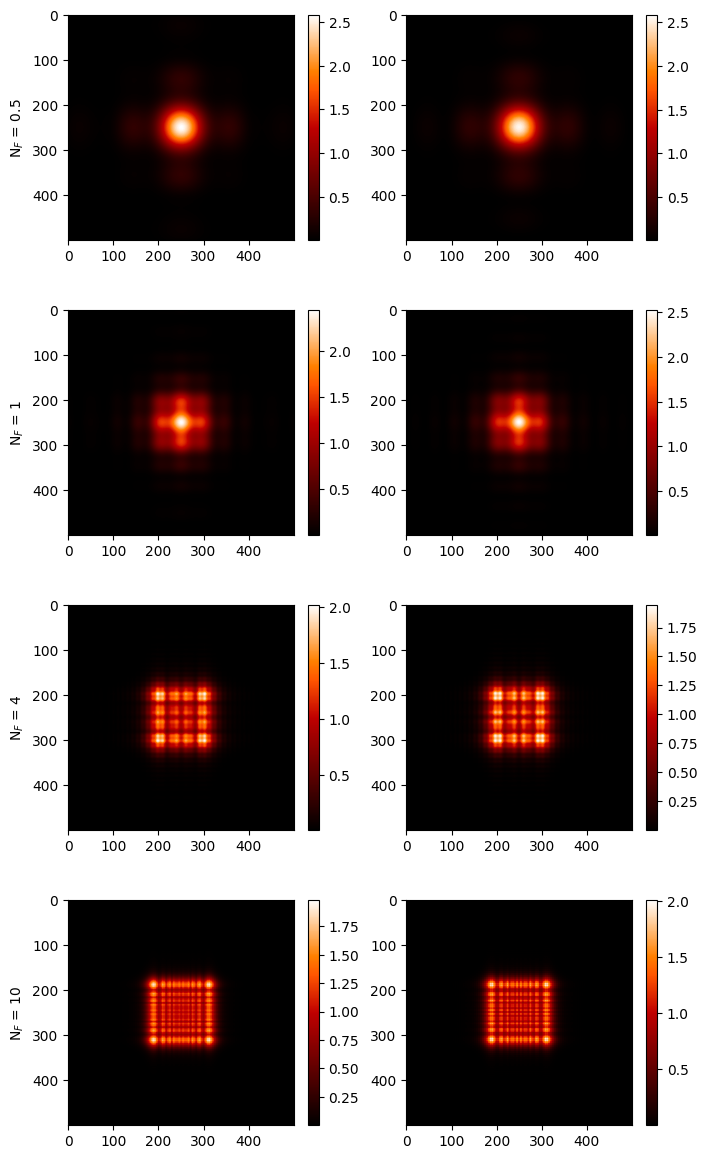

In [24]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.abs(F_out[i].field)**2, cmap='gist_heat')
    im2=ax[i][1].imshow(np.abs(E_out[i][start_end[i][0]:start_end[i][1], start_end[i][0]:start_end[i][1]])**2, cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

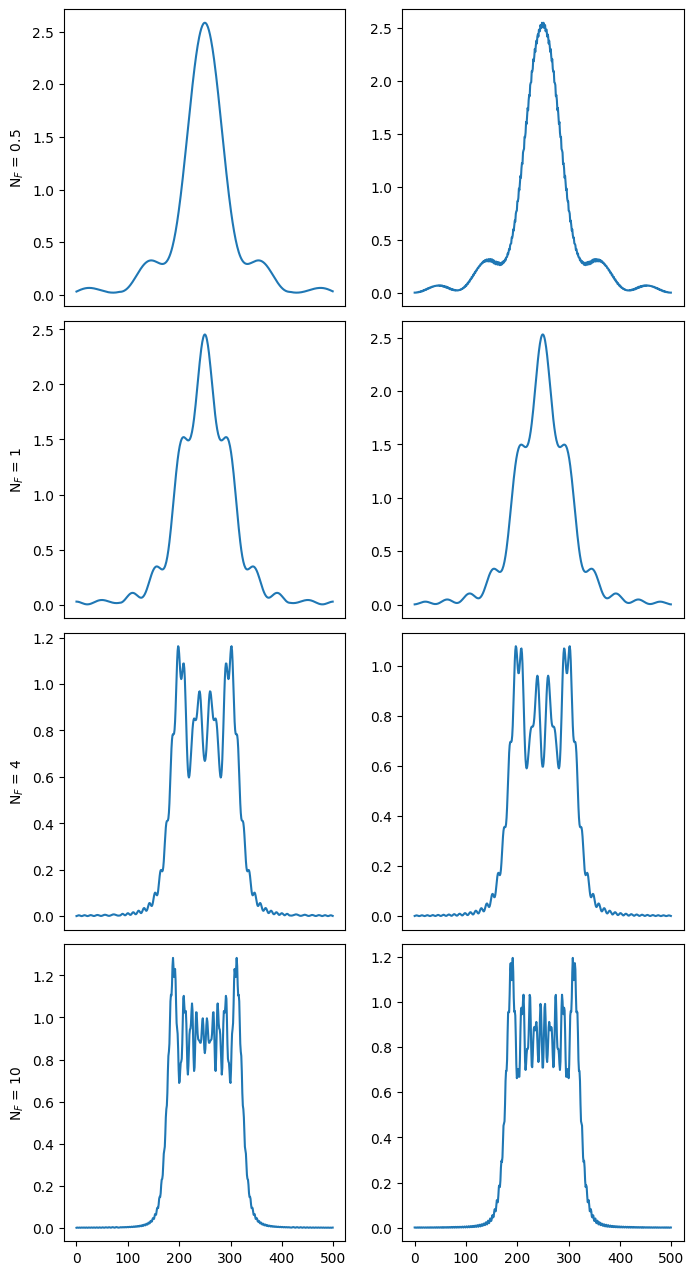

In [25]:
# cross section plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    ax[i][0].plot(np.abs(F_out[i].field[int(len(F_out[i].field)/2)])**2)
    ax[i][1].plot(np.abs(E_out[i][int(len(E_out[i])/2)][start_end[i][0]:start_end[i][1]])**2)
    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

ax[0][0].set_xticklabels([])
ax[0][1].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[2][0].set_xticklabels([])
ax[2][1].set_xticklabels([])

ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[2][0].set_xticks([])
ax[2][1].set_xticks([])

fig.subplots_adjust(hspace=0.05)

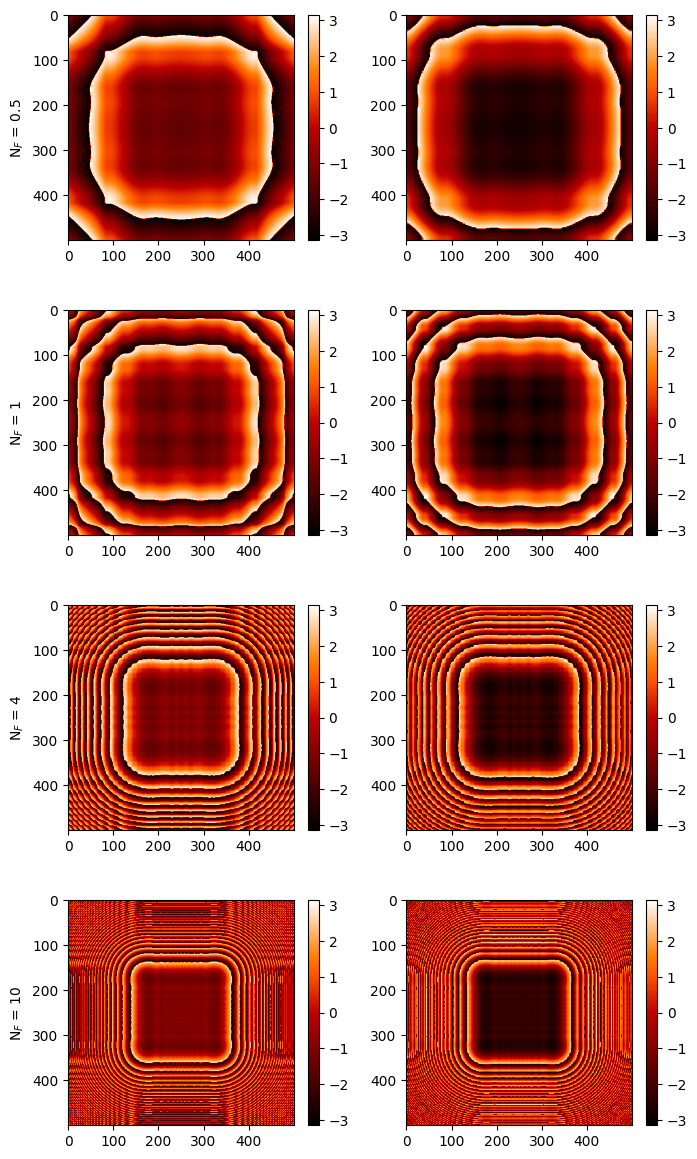

In [26]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.angle(F_out[i].field), cmap='gist_heat')
    im2=ax[i][1].imshow(np.angle(E_out[i][start_end[i][0]:start_end[i][1], start_end[i][0]:start_end[i][1]]), cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

In [28]:
# numerical comparison on number of photons

print("LightPipes comparison:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(F_in[i].field)**2), "| out =", np.sum(np.abs(F_out[i].field)**2))

print("\nCustom method:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(E_in[i])**2), "| out =", np.sum(np.abs(E_out[i])**2))

LightPipes comparison:
N_F = 0.5 | in = 27889.0 | out = 25785.750769966562
N_F = 1 | in = 27889.0 | out = 26799.865115652286
N_F = 4 | in = 27889.0 | out = 27590.095787855214
N_F = 10 | in = 27889.0 | out = 27696.048752302962

Custom method:
N_F = 0.5 | in = 27556.0 | out = 27556.000000000065
N_F = 1 | in = 27556.0 | out = 27556.000000000033
N_F = 4 | in = 27556.0 | out = 27555.999999999996
N_F = 10 | in = 27556.0 | out = 27556.00000000002


## Simple case - beam passing through circle aperture

In [41]:
F_in = []
E_in = []

F_out = []
E_out = []
start_end = []

for n in N_F:
    w = np.sqrt(n*lambda_*z)
    grid_size = 10*w

    f_in = lp.Begin(grid_size, lambda_, grid_dimension)
    f_in = lp.CircAperture(w, 0, 0, f_in)
    F_in.append(f_in)

    x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    X,Y = np.meshgrid(x,y)

    e_in = np.ones([grid_dimension,grid_dimension], dtype = np.complex128)
    e_in [np.sqrt(X**2 + Y**2) > w] = 0 +0j
    E_in.append(e_in)

    F_out.append(lp.Forvard(f_in, z))
    e_out, start, end = fresnel_propagation(e_in, lambda_, z, grid_size/grid_dimension, padding_factor=8)
    
    E_out.append(e_out)
    start_end.append((start, end))

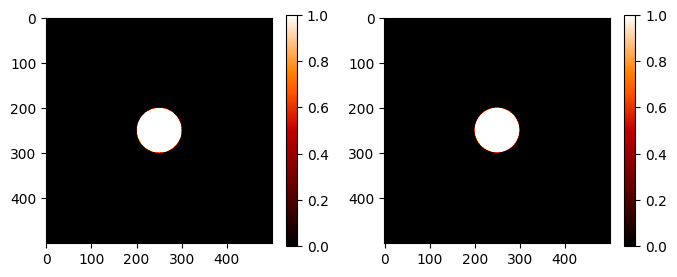

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in[0].field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(E_in[0])**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

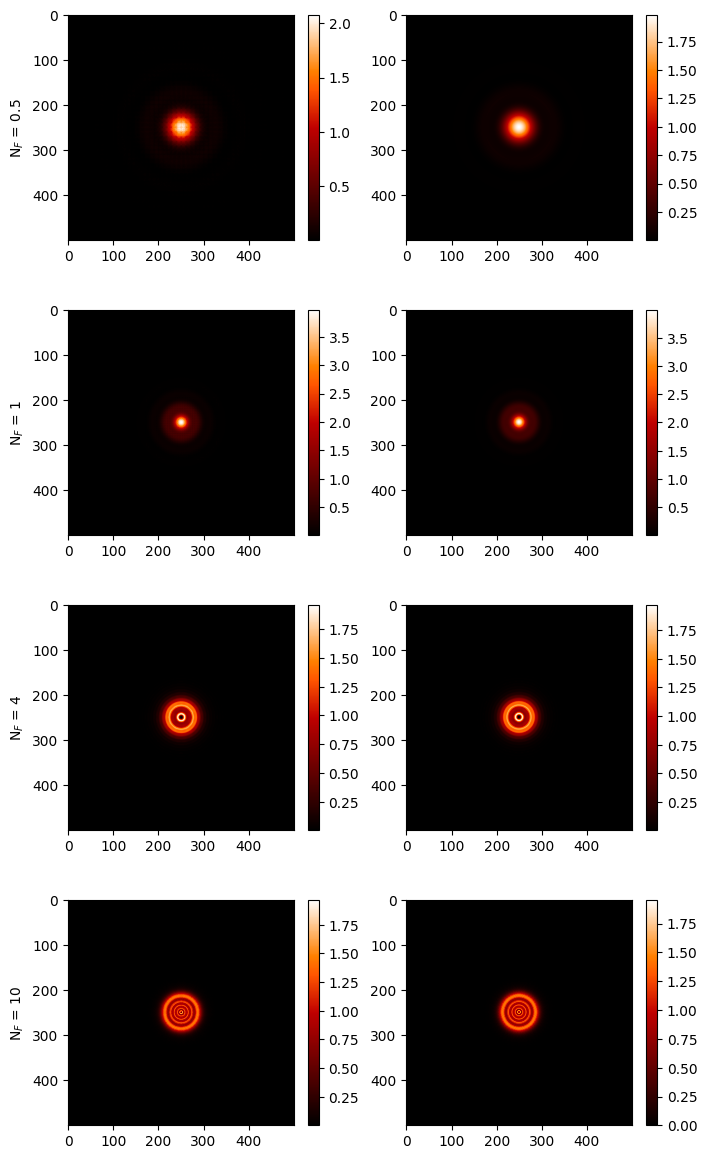

In [43]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.abs(F_out[i].field)**2, cmap='gist_heat')
    im2=ax[i][1].imshow(np.abs(E_out[i][start_end[i][0]:start_end[i][1], start_end[i][0]:start_end[i][1]])**2, cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

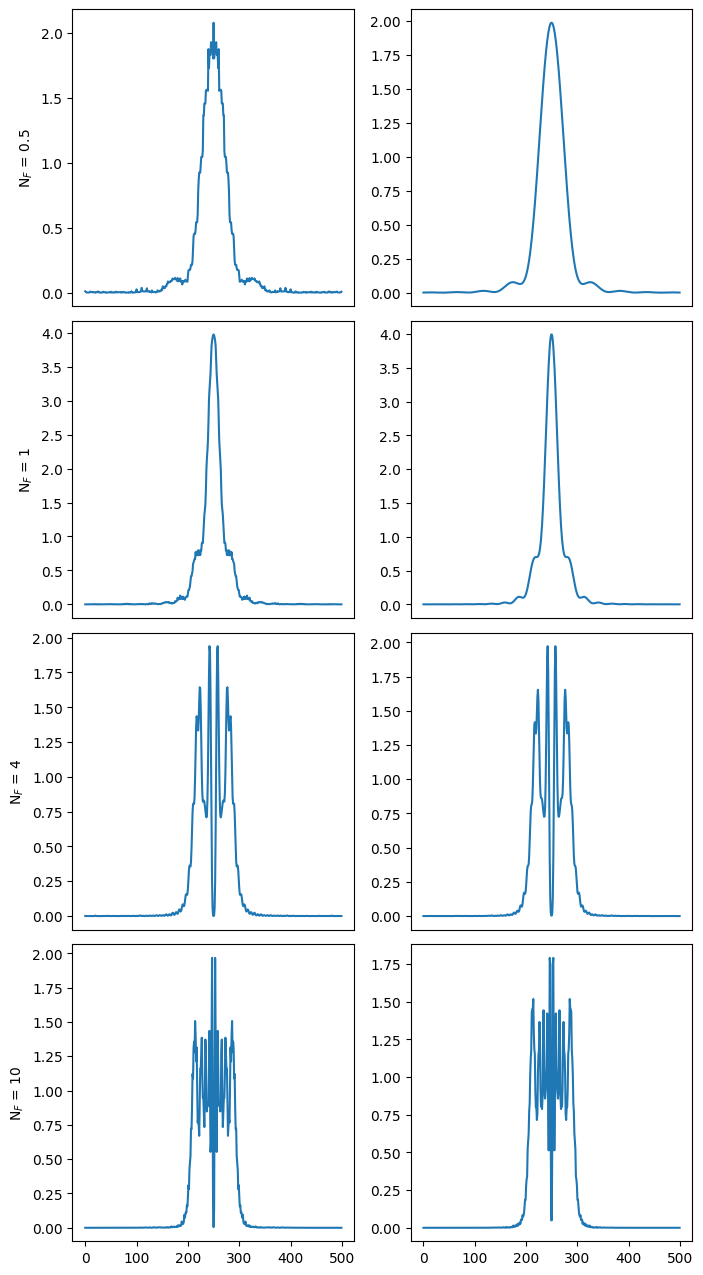

In [44]:
# cross section plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    ax[i][0].plot(np.abs(F_out[i].field[int(len(F_out[i].field)/2)])**2)
    ax[i][1].plot(np.abs(E_out[i][int(len(E_out[i])/2)][start_end[i][0]:start_end[i][1]])**2)
    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

ax[0][0].set_xticklabels([])
ax[0][1].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[2][0].set_xticklabels([])
ax[2][1].set_xticklabels([])

ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[2][0].set_xticks([])
ax[2][1].set_xticks([])

fig.subplots_adjust(hspace=0.05)

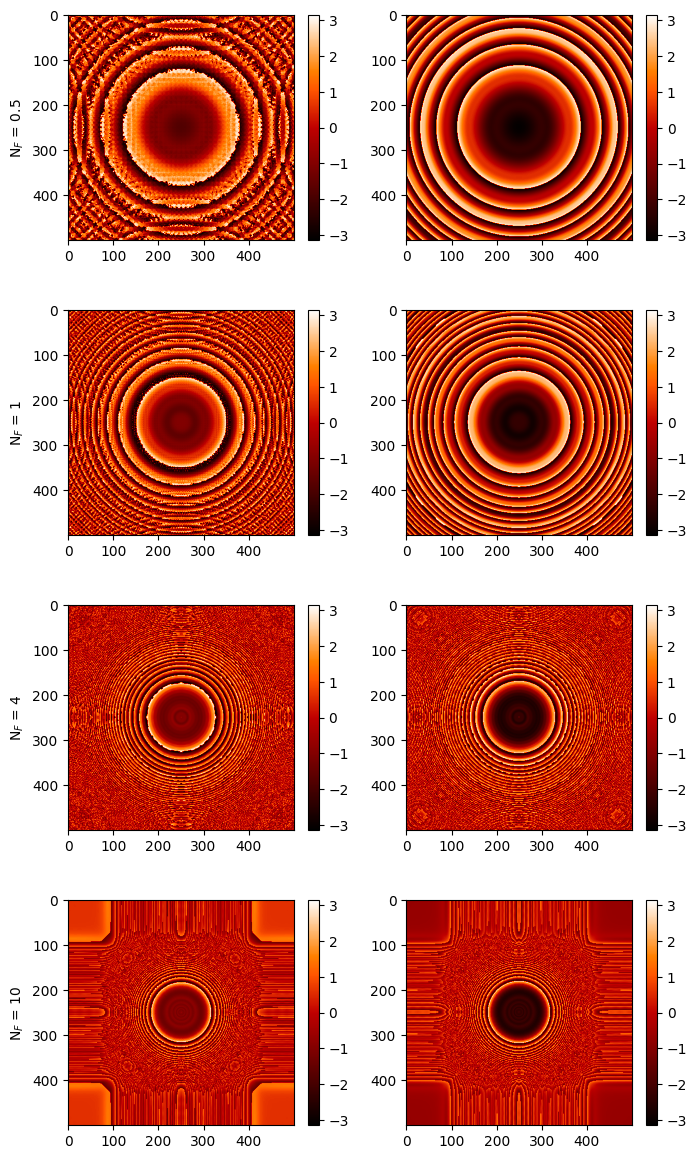

In [45]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.angle(F_out[i].field), cmap='gist_heat')
    im2=ax[i][1].imshow(np.angle(E_out[i][start_end[i][0]:start_end[i][1], start_end[i][0]:start_end[i][1]]), cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

In [46]:
# numerical comparison on number of photons

print("LightPipes comparison:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(F_in[i].field)**2), "| out =", np.sum(np.abs(F_out[i].field)**2))

print("\nCustom method:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(E_in[i])**2), "| out =", np.sum(np.abs(E_out[i])**2))

LightPipes comparison:
N_F = 0.5 | in = 7845.0 | out = 7845.000000000001
N_F = 1 | in = 7845.0 | out = 7845.000000000002
N_F = 4 | in = 7845.0 | out = 7845.000000000005
N_F = 10 | in = 7837.0 | out = 7837.000000000004

Custom method:
N_F = 0.5 | in = 7820.0 | out = 7820.000000000001
N_F = 1 | in = 7820.0 | out = 7820.00000000002
N_F = 4 | in = 7820.0 | out = 7820.000000000007
N_F = 10 | in = 7820.0 | out = 7820.0000000000055


## Simple case using a Gaussian beam

In [ ]:
F_in = []
E_in = []

F_out = []
E_out = []

for n in N_F:
    w = np.sqrt(n*lambda_*z)
    grid_size = 6*w

    f_in = lp.Begin(grid_size, lambda_, grid_dimension)
    f_in = lp.GaussAperture(f_in, w)
    f_in.field = np.sqrt(I0) * f_in.field
    F_in.append(f_in)

    x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    X,Y = np.meshgrid(x,y)

    e_in = np.sqrt(I0)*create_gaussian_mask(X, Y, diameter=2*w)
    E_in.append(e_in)

    F_out.append(lp.Forvard(f_in, z))
    E_out.append(fresnel_propagation(e_in, lambda_, z, grid_size/grid_dimension))

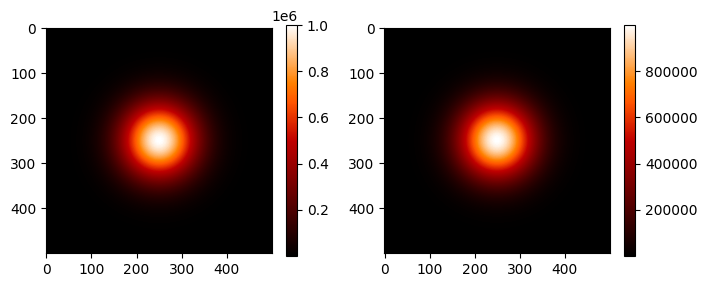

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in[0].field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(E_in[0])**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

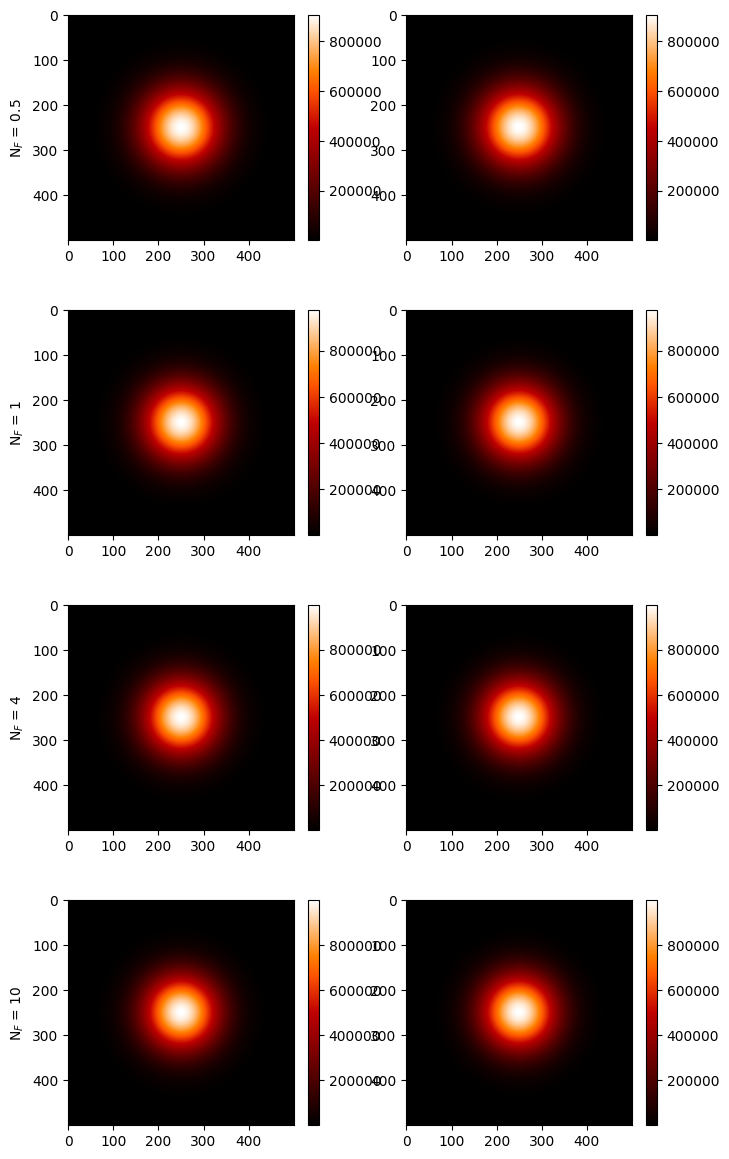

In [ ]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.abs(F_out[i].field)**2, cmap='gist_heat')
    im2=ax[i][1].imshow(np.abs(E_out[i])**2, cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

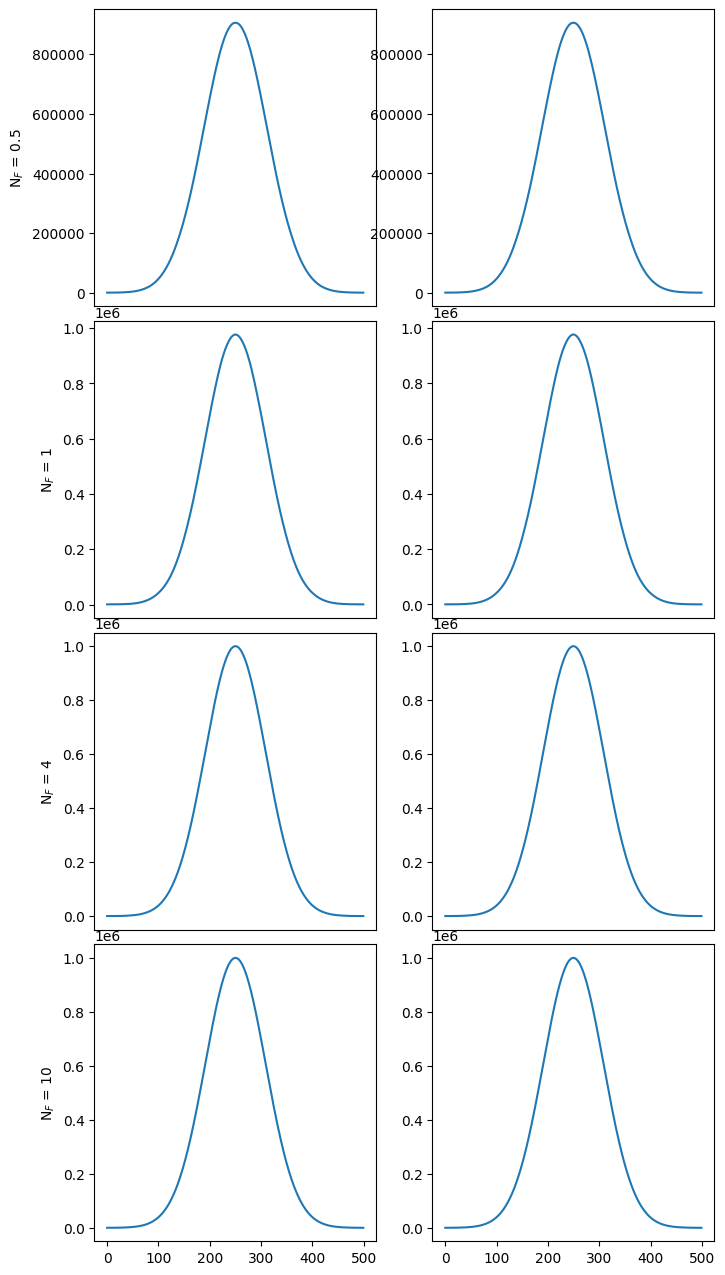

In [ ]:
# cross section plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    ax[i][0].plot(np.abs(F_out[i].field[int(len(F_out[i].field)/2)])**2)
    ax[i][1].plot(np.abs(E_out[i][int(len(E_out[i])/2)])**2)
    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

ax[0][0].set_xticklabels([])
ax[0][1].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[2][0].set_xticklabels([])
ax[2][1].set_xticklabels([])

ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[2][0].set_xticks([])
ax[2][1].set_xticks([])

fig.subplots_adjust(hspace=0.05)

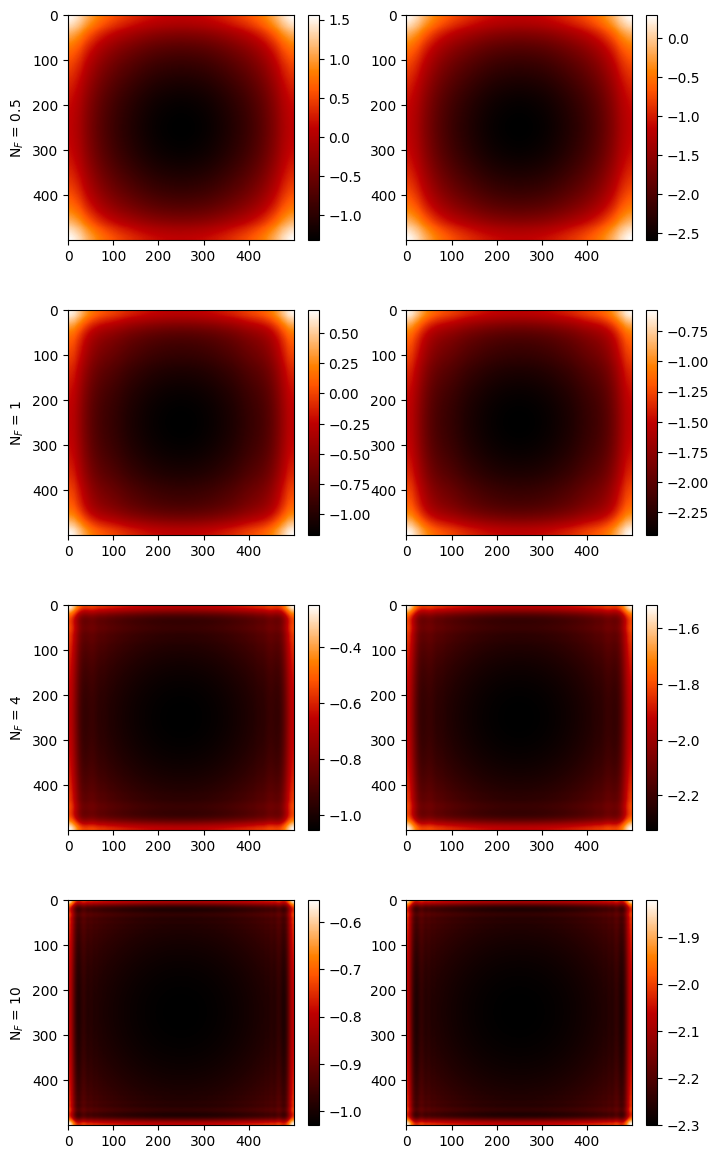

In [ ]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.angle(F_out[i].field), cmap='gist_heat')
    im2=ax[i][1].imshow(np.angle(E_out[i]), cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

In [ ]:
# numerical comparison on number of photons

print("LightPipes comparison:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(F_in[i].field)**2), "| out =", np.sum(np.abs(F_out[i].field)**2))

print("\nCustom method:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(E_in[i])**2), "| out =", np.sum(np.abs(E_out[i])**2))

LightPipes comparison:
N_F = 0.5 | in = 21815651343.37513 | out = 21815651343.375134
N_F = 1 | in = 21815651343.37514 | out = 21815651343.37515
N_F = 4 | in = 21815651343.37514 | out = 21815651343.375153
N_F = 10 | in = 21815651343.37513 | out = 21815651343.375134

Custom method:
N_F = 0.5 | in = 21728512381.5213 | out = 21728512381.521305
N_F = 1 | in = 21728512381.52131 | out = 21728512381.521313
N_F = 4 | in = 21728512381.52131 | out = 21728512381.52131
N_F = 10 | in = 21728512381.5213 | out = 21728512381.5213
